In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [166]:
import warnings
warnings.simplefilter(action='ignore')

In [167]:
df = pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Exploration

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [169]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [170]:
df.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

## Data Cleaning

In [171]:
# Delete duplicate rows
df.drop_duplicates(inplace=True)

In [172]:
# Drop unwanted columns
df.drop(columns=['address', 'phone', 'reviews_list', 'listed_in(type)', 'location', 'dish_liked', 'menu_item'], inplace = True)
df

,url,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Bar,Continental,"1,500",Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,Vinod Bar And Restaurant,No,No,NaN,0,Bar,Finger Food,600,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Bar,Finger Food,"2,000",Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,Bar,Finger Food,"2,500",Whitefield


## Column wise Data Cleaning

#### Name

In [173]:
# Rename Column
df.rename(columns = {'name' : 'Name'}, inplace=True)

In [174]:
# check for null values & blank values
print("NULL values : ",df['Name'].isnull().sum())
print("Blank values: ", (df['Name']=="").sum())

NULL values :  0
Blank values:  0


In [175]:
print("No. of unique values : ",df['Name'].nunique())
df['Name'].unique()

No. of unique values :  8792


array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [176]:
df['Name'].replace(r"[^a-zA-Z0-9 ]", "", regex=True, inplace=True)

#### Online_Order

In [177]:
# Rename Column
df.rename(columns = {'online_order' : 'Online_Order'}, inplace=True)

In [178]:
# check for null values & blank values
print("NULL values : ",df['Online_Order'].isnull().sum())
print("Blank values: ", (df['Online_Order']=="").sum())

NULL values :  0
Blank values:  0


In [179]:
print("No. of unique values : ",df['Online_Order'].nunique())
df['Online_Order'].unique()

No. of unique values :  2


array(['Yes', 'No'], dtype=object)

In [180]:
# Assign Datatype
df['Online_Order'] = df['Online_Order'].astype('category')

#### Book_Table

In [181]:
# Rename Column
df.rename(columns = {'book_table' : 'Book_Table'}, inplace=True)

In [182]:
# check for null values & blank values
print("NULL values : ",df['Book_Table'].isnull().sum())
print("Blank values: ", (df['Book_Table']=="").sum())

NULL values :  0
Blank values:  0


In [183]:
print("No. of unique values : ",df['Book_Table'].nunique())
df['Book_Table'].unique()

No. of unique values :  2


array(['Yes', 'No'], dtype=object)

In [184]:
# Assign Datatype
df['Book_Table'] = df['Book_Table'].astype('category')

#### Rating

In [185]:
# Rename Column
df.rename(columns = {'rate' : 'Rating'}, inplace=True)

In [186]:
# check for null values & blank values
print("NULL values : ",df['Rating'].isnull().sum())
print("Blank values: ", (df['Rating']=="").sum())

NULL values :  7775
Blank values:  0


In [187]:
print("No. of unique values : ",df['Rating'].nunique())
df['Rating'].unique()

No. of unique values :  64


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [188]:
# Data Formatting
# Remove '/5' from Rating values
df['Rating'] = df['Rating'].str.strip('/5')

In [189]:
# Replace null values and other inappropriate values with ''.
df['Rating'].replace('nan', np.NaN, regex=True, inplace=True)
df['Rating'].replace('-', np.NaN, regex=True, inplace=True)
df['Rating'].replace('', np.NaN, regex=True, inplace=True)
df['Rating'].replace('NEW', np.NaN, regex=True, inplace=True)
df['Rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.', '2.6',
       '3.8 ', '3.4', '4.', '2.', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [190]:
# Change datatype
df['Rating'] = df['Rating'].astype('float')

In [191]:
df['Rating'].mean()

3.6797719908796354

In [192]:
# Fill Null Value
df['Rating'].fillna(3.7 , inplace=True)
df['Rating'].isnull().sum()

0

#### Votes

In [193]:
# Rename Column
df.rename(columns = {'votes' : 'Votes'}, inplace=True)

In [194]:
# check for null values & blank values
print("NULL values : ",df['Votes'].isnull().sum())
print("Blank values: ", (df['Votes']=="").sum())

NULL values :  0
Blank values:  0


In [195]:
print("No. of unique values : ",df['Votes'].nunique())
df['Votes'].unique()

No. of unique values :  2328


array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [196]:
# Assign Datatype
df['Votes'] = df['Votes'].astype('int')
df['Votes'].dtype

dtype('int32')

#### Rest_Type

In [197]:
# Rename Column
df.rename(columns = {'rest_type' : 'Rest_Type'}, inplace=True)

In [198]:
# check for null values & blank values
print("NULL values : ",df['Rest_Type'].isnull().sum())
print("Blank values: ", (df['Rest_Type']=="").sum())

NULL values :  227
Blank values:  0


In [199]:
print("No. of unique values : ",df['Rest_Type'].nunique())
df['Rest_Type'].unique()

No. of unique values :  93


array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [200]:
df['Rest_Type'].mode()

0    Quick Bites
Name: Rest_Type, dtype: object

In [201]:
# Fill Null Value with mode value
df['Rest_Type'].fillna("Quick Bites", inplace=True)
df['Rest_Type'].isnull().sum()

0

In [202]:
# Assign Datatype
df['Rest_Type'] = df['Rest_Type'].astype('category')

#### Cuisines

In [203]:
# Rename Column
df.rename(columns = {'cuisines' : 'Cuisines'}, inplace=True)

In [204]:
# check for null values & blank values
print("NULL values : ",df['Cuisines'].isnull().sum())
print("Blank values: ", (df['Cuisines']=="").sum())

NULL values :  45
Blank values:  0


In [205]:
print("No. of unique values : ",df['Cuisines'].nunique())
df['Cuisines'].unique()

No. of unique values :  2723


array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [206]:
df['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [207]:
# Fill Null Value with mode value
df['Cuisines'].fillna("North Indian", inplace=True)
df['Cuisines'].isnull().sum()

0

#### Approx_Cost(for two people)

In [208]:
# Rename Column
df.rename(columns = {'approx_cost(for two people)' : 'Approx_Cost(for two people)'}, inplace=True)

In [209]:
# check for null values & blank values
print("NULL values : ",df['Approx_Cost(for two people)'].isnull().sum())
print("Blank values: ", (df['Approx_Cost(for two people)']=="").sum())

NULL values :  346
Blank values:  0


In [210]:
print("No. of unique values : ",df['Approx_Cost(for two people)'].nunique())
df['Approx_Cost(for two people)'].unique()

No. of unique values :  70


array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [211]:
# Data Formatting
# Remove ',' from Approx_Cost(for two people) values
df['Approx_Cost(for two people)'].replace(',', '', regex=True, inplace=True)
df['Approx_Cost(for two people)'].replace('nan', np.NaN, regex=True)
df['Approx_Cost(for two people)']

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: Approx_Cost(for two people), Length: 51717, dtype: object

In [212]:
#Assign Datatype
df['Approx_Cost(for two people)'] = df['Approx_Cost(for two people)'].astype('float')
df['Approx_Cost(for two people)'].dtype

dtype('float64')

In [213]:
df['Approx_Cost(for two people)'].mean()

555.4315664479959

In [214]:
# Fill Null Value with mode value
df['Approx_Cost(for two people)'].fillna(555 , inplace=True)
df['Approx_Cost(for two people)'].isnull().sum()

0

#### Location_city

In [215]:
# Rename Column
df.rename(columns = {'listed_in(city)' : 'Location_City'}, inplace=True)

In [216]:
# check for null values & blank values
print("NULL values : ",df['Location_City'].isnull().sum())
print("Blank values: ", (df['Location_City']=="").sum())

NULL values :  0
Blank values:  0


In [217]:
print("No. of unique values : ",df['Location_City'].nunique())
df['Location_City'].unique()

No. of unique values :  30


array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [218]:
# Assign Datatype
df['Location_City'] = df['Location_City'].astype('category')

## Exploratory Data Analysis

In [219]:
df.head()

,url,Name,Online_Order,Book_Table,Rating,Votes,Rest_Type,Cuisines,Approx_Cost(for two people),Location_City
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


####  How many restaurants in Bangalore take online orders?

Online_Order
Yes    30444
No     21273
Name: count, dtype: int64


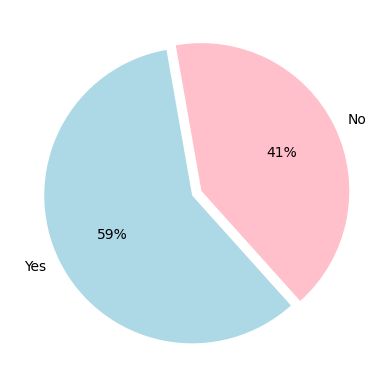

In [220]:

print(df['Online_Order'].value_counts())
df['Online_Order'].value_counts().plot(kind = 'pie', colors = ['lightblue', 'pink'], autopct='%1.0f%%', explode=(0.02, 0.05),
                                         startangle=100, ylabel='')
plt.show()

#### What percentage of restaurants offer table booking facilities?

Book_Table
No     45268
Yes     6449
Name: count, dtype: int64


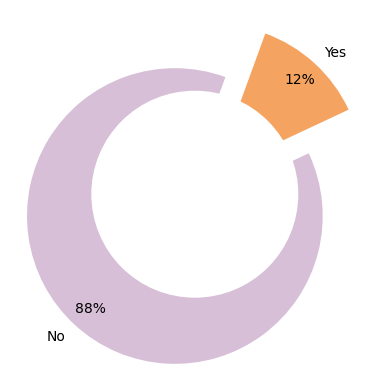

In [221]:
print(df['Book_Table'].value_counts())
df['Book_Table'].value_counts().plot(kind = 'pie', colors = ['Thistle', 'SandyBrown'], autopct='%1.0f%%', explode=(0.2, 0.2),
                                     startangle=70, ylabel='', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('')
plt.show()

#### Which are the top 10 highest-rated restaurants?

In [233]:
df.groupby('Name')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False).round(2)[0:10]

,Name,Rating
589,Asia Kitchen By Mainland China,4.90
6505,Sant Spa Cuisine,4.90
1264,Byg Brewski Brewing Company,4.90
5890,Punjab Grill,4.87
856,Belgian Waffle Factory,4.84
5436,OG Variar Sons,4.80
7989,The Pizza Bakery,4.80
2576,Flechazo,4.80
794,Barbecue by Punjab Grill,4.75
1278,CTR,4.75


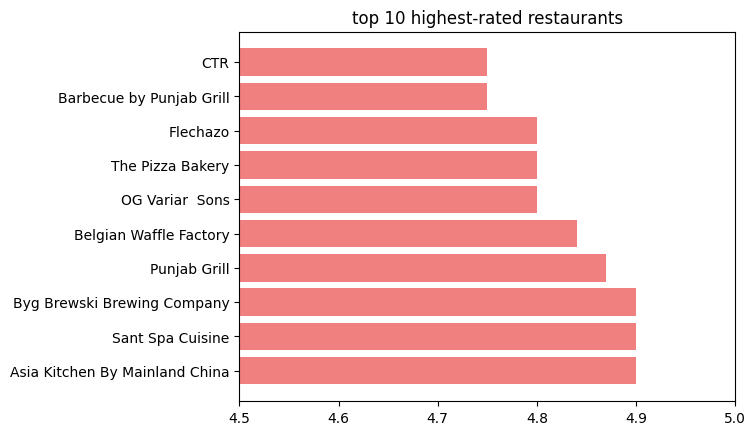

In [223]:
x = (df.groupby('Name')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False).round(2)[0:10])['Name']
y = (df.groupby('Name')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False).round(2)[0:10])['Rating']
plt.barh(x, y, color='LightCoral')
plt.title('top 10 highest-rated restaurants')
plt.xlim(4.5, 5)
plt.show()

#### The top five cities in Bangalore with the highest and lowest-rated restaurants

In [224]:
print('The top five cities in Bangalore with the highest rated restaurants : ') 
print('\n')
print(df.groupby('Location_City')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False).round(2).head())
print('\n')
print('The top five cities in Bangalore with the lowest rated restaurants : ')
print('\n')
print(df.groupby('Location_City')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=True).round(2).head())

The top five cities in Bangalore with the highest rated restaurants : 


     Location_City  Rating
21         MG Road    3.79
27  Residency Road    3.77
20    Lavelle Road    3.76
7    Church Street    3.76
5     Brigade Road    3.75


The top five cities in Bangalore with the lowest rated restaurants : 


        Location_City  Rating
8     Electronic City    3.53
2   Bannerghatta Road    3.56
6         Brookefield    3.57
23       Marathahalli    3.58
4           Bellandur    3.61


#### Does the restaurant’s rating depend on whether it accepts online orders?

Online_Order
No     3.658031
Yes    3.701642
Name: Rating, dtype: float64


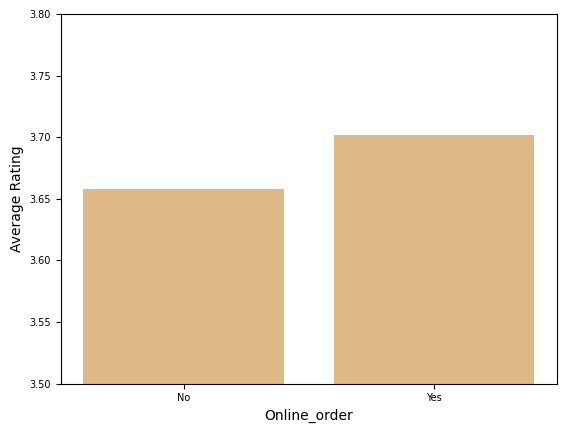

In [225]:
print(df.groupby('Online_Order')['Rating'].mean())
x = (df.groupby('Online_Order')['Rating'].mean().reset_index())['Online_Order']
y = (df.groupby('Online_Order')['Rating'].mean().reset_index())['Rating']
plt.bar(x, y, color='BurlyWood')
plt.ylim(3.5, 3.8)
plt.xlabel('Online_order')
plt.ylabel('Average Rating')
plt.xticks(size=7)
plt.yticks(size=7)
plt.show()

#### Rating Vs No. of Votes

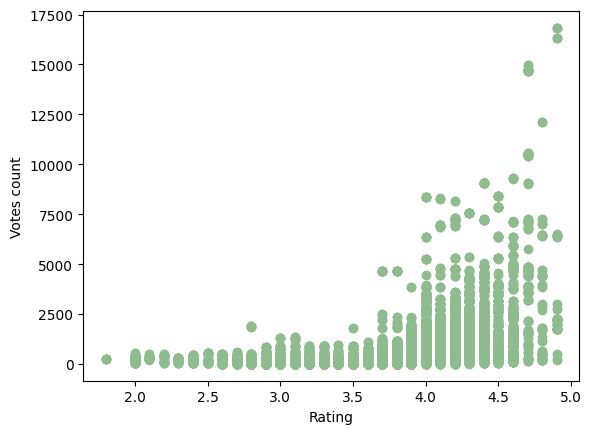

In [226]:
plt.scatter(df['Rating'], df['Votes'], color='DarkSeaGreen')
plt.xlabel('Rating')
plt.ylabel('Votes count')
plt.show()

#### What is the average price for two people, based on the type of service?

In [227]:
df.groupby('Rest_Type')['Approx_Cost(for two people)'].mean().reset_index().sort_values(by='Approx_Cost(for two people)', ascending=False).round(2)

,Rest_Type,Approx_Cost(for two people)
50,"Fine Dining, Bar",3002.50
52,"Fine Dining, Microbrewery",3000.00
51,"Fine Dining, Lounge",3000.00
49,Fine Dining,2707.51
11,"Bar, Lounge",2450.00
...,...,...
45,"Dessert Parlor, Kiosk",200.00
54,"Food Court, Beverage Shop",200.00
1,"Bakery, Beverage Shop",178.12
44,"Dessert Parlor, Food Court",100.00


#### Is there any correlation between approximated cost for two people and the ratings of a restaurant?

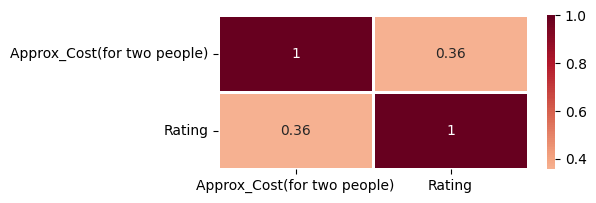

In [228]:
df1 = df[['Approx_Cost(for two people)', 'Rating']]
corr = df1.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0, linewidth=1)
plt.show()

#### What kind of a Food is more popular in a locality?

In [229]:
df[['Location_City', 'Cuisines']].groupby('Location_City').sum()

,Cuisines
Location_City,
BTM,"European, Mediterranean, North Indian, BBQCont..."
Banashankari,"North Indian, Mughlai, ChineseChinese, North I..."
Bannerghatta Road,"North Indian, ItalianArabian, Biryani, Chinese..."
Basavanagudi,"North Indian, South IndianChinese, Continental..."
Bellandur,"North Indian, South Indian, ContinentalSeafood..."
Brigade Road,"North Indian, South IndianNorth Indian, Chines..."
Brookefield,"Pizza, Cafe, ItalianNorth Indian, Arabian, Mug..."
Church Street,"North Indian, Chinese, MughlaiNorth Indian, Ch..."
Electronic City,"Continental, American, South Indian, Italian, ..."


#### Top 15 Cuisines Of Bengaluru based on Rating

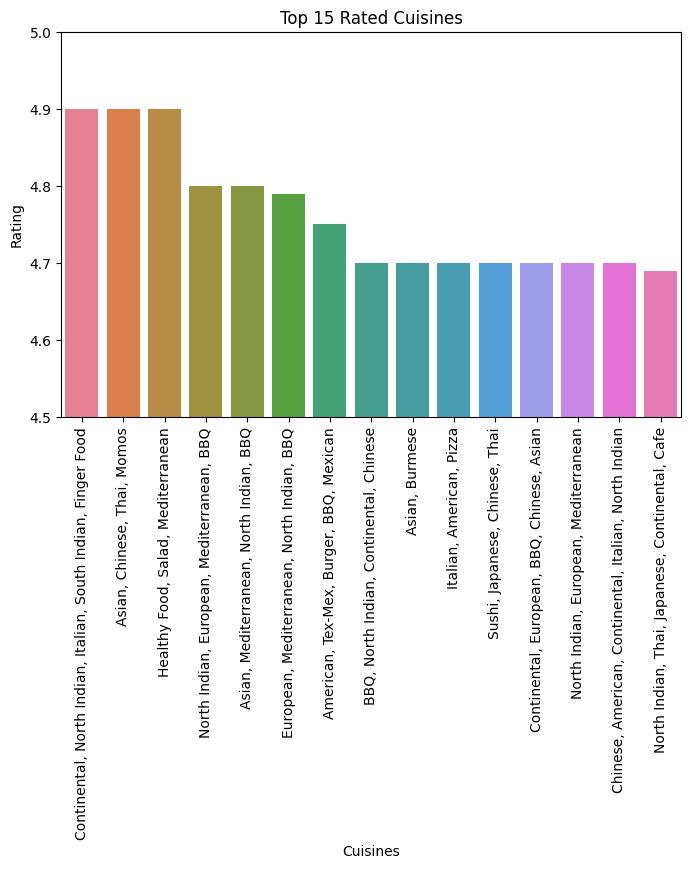

In [230]:
plt.figure(figsize=(8,5))
a = (df.groupby('Cuisines')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False).round(2)[0:15])['Cuisines']
b = (df.groupby('Cuisines')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False).round(2)[0:15])['Rating']
sns.barplot(x=a, y=b, hue=a)
plt.title('Top 15 Rated Cuisines')
plt.ylabel('Rating')
plt.ylim(4.5,5)
plt.xticks(rotation = 90)
plt.show()

#### Average cost of food in each city of Bangalore

In [231]:
df.groupby('Location_City')['Approx_Cost(for two people)'].mean().reset_index().sort_values(by='Approx_Cost(for two people)', ascending=False).round(2)

,Location_City,Approx_Cost(for two people)
7,Church Street,771.04
5,Brigade Road,766.85
21,MG Road,761.33
20,Lavelle Road,752.22
27,Residency Road,741.10
11,Indiranagar,654.06
25,Old Airport Road,609.51
29,Whitefield,578.97
22,Malleshwaram,574.75
9,Frazer Town,558.22
